In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Import citipy
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, add to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

597

In [6]:
# Build basic URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({'City': city.title(),
                         'Lat': city_lat,
                         'Lng': city_lng,
                         'Max Temp': city_max_temp,
                         'Humidity': city_humidity,
                         'Cloudiness': city_clouds,
                         'Wind Speed': city_wind,
                         'Country': city_country,
                         'Date': city_date})
        
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 1 | muchkapskiy
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | aklavik
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | necochea
Processing Record 7 of Set 1 | saint-pierre
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | sorland
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | shakawe
Processing Record 12 of Set 1 | taywarah
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | the valley
Processing Record 15 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 16 of Set 1 | labuhan
Processing Record 17 of Set 1 | muisne
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | riyadh
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | santa cruz cabralia


Processing Record 38 of Set 4 | byron bay
Processing Record 39 of Set 4 | zhaotong
Processing Record 40 of Set 4 | new norfolk
Processing Record 41 of Set 4 | ancud
Processing Record 42 of Set 4 | ajaccio
Processing Record 43 of Set 4 | rio grande
Processing Record 44 of Set 4 | carnarvon
Processing Record 45 of Set 4 | codrington
Processing Record 46 of Set 4 | margate
Processing Record 47 of Set 4 | severo-kurilsk
Processing Record 48 of Set 4 | lana
Processing Record 49 of Set 4 | rundu
Processing Record 50 of Set 4 | coachella
Processing Record 1 of Set 5 | iqaluit
Processing Record 2 of Set 5 | flinders
Processing Record 3 of Set 5 | hirara
Processing Record 4 of Set 5 | nioro
Processing Record 5 of Set 5 | kavaratti
Processing Record 6 of Set 5 | gat
Processing Record 7 of Set 5 | ilhabela
Processing Record 8 of Set 5 | mana
Processing Record 9 of Set 5 | dinsor
City not found. Skipping...
Processing Record 10 of Set 5 | amapa
Processing Record 11 of Set 5 | mansa
Processing Reco

Processing Record 30 of Set 8 | hapao
Processing Record 31 of Set 8 | poum
Processing Record 32 of Set 8 | tazovskiy
Processing Record 33 of Set 8 | kismayo
Processing Record 34 of Set 8 | altay
Processing Record 35 of Set 8 | safaga
Processing Record 36 of Set 8 | okhotsk
Processing Record 37 of Set 8 | yining
Processing Record 38 of Set 8 | whitehorse
Processing Record 39 of Set 8 | ekhabi
Processing Record 40 of Set 8 | maniitsoq
Processing Record 41 of Set 8 | dawson creek
Processing Record 42 of Set 8 | itarema
Processing Record 43 of Set 8 | yantai
Processing Record 44 of Set 8 | conceicao do araguaia
Processing Record 45 of Set 8 | san alberto
Processing Record 46 of Set 8 | paamiut
Processing Record 47 of Set 8 | sao jose do calcado
Processing Record 48 of Set 8 | isabela
Processing Record 49 of Set 8 | wanaka
Processing Record 50 of Set 8 | kieta
Processing Record 1 of Set 9 | nemea
Processing Record 2 of Set 9 | sala consilina
Processing Record 3 of Set 9 | palabuhanratu
City

Processing Record 21 of Set 12 | henties bay
Processing Record 22 of Set 12 | anshun
Processing Record 23 of Set 12 | cidreira
Processing Record 24 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 25 of Set 12 | payo
Processing Record 26 of Set 12 | dzhebariki-khaya
Processing Record 27 of Set 12 | san lawrenz
Processing Record 28 of Set 12 | morondava
Processing Record 29 of Set 12 | maningrida
Processing Record 30 of Set 12 | donskoy
Processing Record 31 of Set 12 | portsoy
Processing Record 32 of Set 12 | lagoa
Processing Record 33 of Set 12 | rocha
Processing Record 34 of Set 12 | veraval
Processing Record 35 of Set 12 | abha
Processing Record 36 of Set 12 | owase
Processing Record 37 of Set 12 | dakar
Processing Record 38 of Set 12 | porto walter
Processing Record 39 of Set 12 | marienburg
Processing Record 40 of Set 12 | beyla
Processing Record 41 of Set 12 | mehran
Processing Record 42 of Set 12 | maumere
Processing Record 43 of Set 12 | bolungarvik
City not fo

In [9]:
# Convert the array of dictionaries to a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Muchkapskiy,51.8513,42.4717,27.09,67,9,7.29,RU,2021-12-11 17:09:01
1,Butaritari,3.0707,172.7902,82.99,76,63,15.59,KI,2021-12-11 17:09:01
2,Aklavik,68.2191,-135.0107,1.40,78,90,13.80,CA,2021-12-11 17:09:02
3,Atuona,-9.8000,-139.0333,78.69,74,43,17.85,PF,2021-12-11 17:09:02
4,Necochea,-38.5473,-58.7368,76.62,58,65,8.63,AR,2021-12-11 17:09:02
5,Saint-Pierre,-21.3393,55.4781,78.44,83,74,3.44,RE,2021-12-11 17:09:03
6,Rikitea,-23.1203,-134.9692,75.34,74,100,14.52,PF,2021-12-11 17:04:20
7,Sorland,67.6670,12.6934,38.80,68,100,16.82,NO,2021-12-11 17:09:03
8,Port Elizabeth,-33.9180,25.5701,68.09,78,52,5.66,ZA,2021-12-11 17:09:03
9,Shakawe,-18.3667,21.8500,79.84,51,91,2.89,BW,2021-12-11 17:09:04


In [10]:
# Rearrange the column order
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Muchkapskiy,RU,2021-12-11 17:09:01,51.8513,42.4717,27.09,67,9,7.29
1,Butaritari,KI,2021-12-11 17:09:01,3.0707,172.7902,82.99,76,63,15.59
2,Aklavik,CA,2021-12-11 17:09:02,68.2191,-135.0107,1.40,78,90,13.80
3,Atuona,PF,2021-12-11 17:09:02,-9.8000,-139.0333,78.69,74,43,17.85
4,Necochea,AR,2021-12-11 17:09:02,-38.5473,-58.7368,76.62,58,65,8.63
5,Saint-Pierre,RE,2021-12-11 17:09:03,-21.3393,55.4781,78.44,83,74,3.44
6,Rikitea,PF,2021-12-11 17:04:20,-23.1203,-134.9692,75.34,74,100,14.52
7,Sorland,NO,2021-12-11 17:09:03,67.6670,12.6934,38.80,68,100,16.82
8,Port Elizabeth,ZA,2021-12-11 17:09:03,-33.9180,25.5701,68.09,78,52,5.66
9,Shakawe,BW,2021-12-11 17:09:04,-18.3667,21.8500,79.84,51,91,2.89


In [11]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

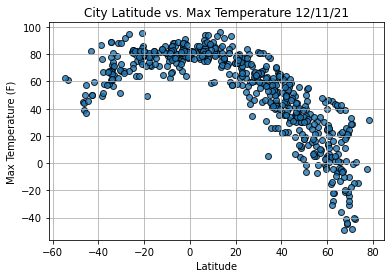

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

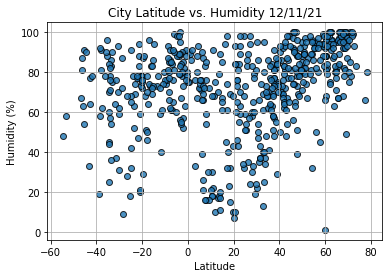

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

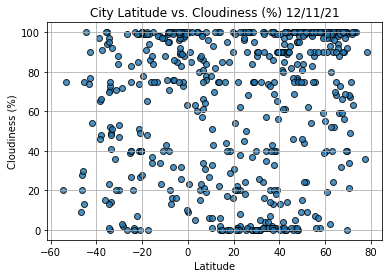

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

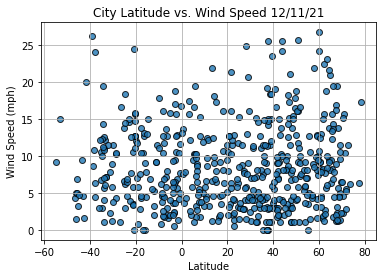

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()